In [1]:
import numpy as np
from numpy import * 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc, patches
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

### Forward Euler

In [28]:
# parameters for the model 
E = 10 # modulus of Maxwell branch 
eta = 1 # viscosity of Maxwell branch 
Einf = 10 # modulus of elastic branch 

# initial condition for internal variable 
epsilon_eta_s = 0 

# loading history is going to be ramp loading, then wait, then unload 
# for time integration
n_t = 100
dt = 0.1
epsilon_vec = np.zeros((n_t))
epsilon_eta_vec = np.zeros((n_t))
sigma_vec = np.zeros((n_t))
time_vec = np.zeros((n_t))

# time integration 
for i in range(n_t):
    # strain history is pre-determined 
    if i<33:
        # for the first third increase linearly the total strain to 0.2
        epsilon = 0.2*i/33
    elif i<=66:
        # for the second third keep at 0.2 
        epsilon = 0.2
    else:
        # for the last third unload but not to zero strain
        epsilon = 0.1+0.1*(n_t-i)/33
    # FORWARD euler 
    epsilon_M_s = epsilon - epsilon_eta_s
    sigma_M_s = E*epsilon_M_s
    epsilon_eta_s1 = epsilon_eta_s + dt*sigma_M_s/E/eta
    # compute total stress
    sigma_M_s1 = E*(epsilon - epsilon_eta_s1)
    sigma = sigma_M_s1 + Einf*epsilon
    # store 
    epsilon_vec[i] = epsilon
    epsilon_eta_vec[i] = epsilon_eta_s1
    sigma_vec[i] = sigma
    time_vec[i] = i*dt
    # reset for next time step
    epsilon_eta_s = epsilon_eta_s1

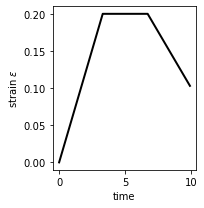

In [45]:
fig = plt.figure(figsize=(3,3))
plt.plot(time_vec,epsilon_vec,color='k',lw=2)
plt.xlabel('time')
plt.ylabel(r'strain $\varepsilon$')
plt.tight_layout()
plt.savefig('images/strain_time_SLS.png',dpi=200)

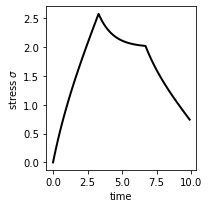

In [46]:
fig = plt.figure(figsize=(3,3))
plt.plot(time_vec,sigma_vec,color='k',lw=2)
plt.xlabel('time')
plt.ylabel(r'stress $\sigma$')
plt.tight_layout()
plt.savefig('images/stress_time_SLS.png',dpi=200)

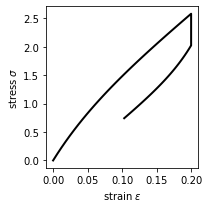

In [47]:
fig = plt.figure(figsize=(3,3))
plt.plot(epsilon_vec,sigma_vec,color='k',lw=2)
plt.xlabel(r'strain $\varepsilon$')
plt.ylabel(r'stress $\sigma$')
plt.tight_layout()
plt.savefig('images/stress_strain_SLS.png',dpi=200)

### Backward Euler

In [48]:
# parameters for the model 
E = 10 # modulus of Maxwell branch 
eta = 1 # viscosity of Maxwell branch 
Einf = 10 # modulus of elastic branch 

# initial condition for internal variable 
epsilon_eta_s = 0 

# loading history is going to be ramp loading, then wait, then unload 
# for time integration
n_t = 100
dt = 0.1
epsilon_vec = np.zeros((n_t))
epsilon_eta_vec = np.zeros((n_t))
sigma_vec = np.zeros((n_t))
time_vec = np.zeros((n_t))

def eval_epsilon(i):
    if i<33:
        # for the first third increase linearly the total strain to 0.2
        epsilon = 0.2*i/33
    elif i<=66:
        # for the second third keep at 0.2 
        epsilon = 0.2
    else:
        # for the last third unload but not to zero strain
        epsilon = 0.1+0.1*(n_t-i)/33
    return epsilon

# time integration 
for i in range(n_t):
    # strain history is pre-determined 
    epsilon = eval_epsilon(i)
    # BACKWARD euler 
    # assume nonlinear and needs to be solved with Newton-Raphson
    resnorm = 1
    iter =0
    itermax = 10
    tol = 1e-5
    # initial guess for NR is to use viscous strain from last step
    epsilon_eta_s1 = epsilon_eta_s
    while resnorm>tol and iter<itermax:
        sigma_M_s1 = E*(epsilon - epsilon_eta_s1)
        res = epsilon_eta_s1 - epsilon_eta_s - dt*sigma_M_s1/E/eta
        resnorm = np.abs(res)
        dres = 1 + dt/eta
        epsilon_eta_s1 = epsilon_eta_s1 - res/dres
        iter+=1
    print('local NR iter = ',iter,', res = ',resnorm)
    # After local Newton just store
    # compute total stress
    sigma_M_s1 = E*(epsilon - epsilon_eta_s1)
    sigma = sigma_M_s1 + Einf*epsilon
    # store 
    epsilon_vec[i] = epsilon
    epsilon_eta_vec[i] = epsilon_eta_s1
    sigma_vec[i] = sigma
    time_vec[i] = i*dt
    # reset for next time step
    epsilon_eta_s = epsilon_eta_s1

local NR iter =  1 , res =  0.0
local NR iter =  2 , res =  0.0
local NR iter =  2 , res =  2.168404344971009e-19
local NR iter =  2 , res =  0.0
local NR iter =  2 , res =  6.505213034913027e-19
local NR iter =  2 , res =  0.0
local NR iter =  2 , res =  1.3010426069826053e-18
local NR iter =  2 , res =  4.336808689942018e-19
local NR iter =  2 , res =  8.673617379884035e-19
local NR iter =  2 , res =  2.168404344971009e-18
local NR iter =  2 , res =  0.0
local NR iter =  2 , res =  1.734723475976807e-18
local NR iter =  2 , res =  1.734723475976807e-18
local NR iter =  2 , res =  1.734723475976807e-18
local NR iter =  2 , res =  8.673617379884035e-19
local NR iter =  2 , res =  1.734723475976807e-18
local NR iter =  2 , res =  4.336808689942018e-18
local NR iter =  2 , res =  3.469446951953614e-18
local NR iter =  2 , res =  2.6020852139652106e-18
local NR iter =  2 , res =  5.204170427930421e-18
local NR iter =  2 , res =  4.336808689942018e-18
local NR iter =  2 , res =  2.60208521

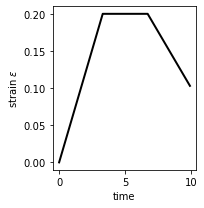

In [49]:
fig = plt.figure(figsize=(3,3))
plt.plot(time_vec,epsilon_vec,color='k',lw=2)
plt.xlabel('time')
plt.ylabel(r'strain $\varepsilon$')
plt.tight_layout()
plt.savefig('images/strain_time_SLS_BE.png',dpi=200)

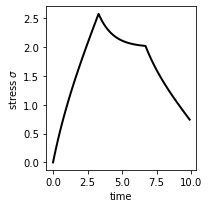

In [50]:
fig = plt.figure(figsize=(3,3))
plt.plot(time_vec,sigma_vec,color='k',lw=2)
plt.xlabel('time')
plt.ylabel(r'stress $\sigma$')
plt.tight_layout()
plt.savefig('images/stress_time_SLS_BE.png',dpi=200)

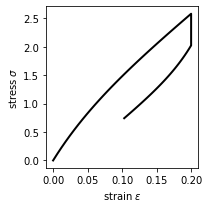

In [51]:
fig = plt.figure(figsize=(3,3))
plt.plot(epsilon_vec,sigma_vec,color='k',lw=2)
plt.xlabel(r'strain $\varepsilon$')
plt.ylabel(r'stress $\sigma$')
plt.tight_layout()
plt.savefig('images/stress_strain_SLS_BE.png',dpi=200)